Link to the file: https://github.com/itu-itis22-esenal22/BLG454E

In [1]:
# Alihan Esen, 150220338

import numpy as np
np.random.seed(0)
from sklearn.datasets import make_blobs

# Generate a dataset using make_blobs
D1_X, D1_y = make_blobs(n_samples=200, centers=[[-2, -2], [2, 2]], cluster_std=1.0, random_state=0)

# Separate the classes
D1_X_class0 = D1_X[D1_y == 0]
D1_y_class0 = np.zeros(D1_X_class0.shape[0])

D1_X_class1 = D1_X[D1_y == 1]
D1_y_class1 = np.ones(D1_X_class1.shape[0])


In [2]:
from sklearn.datasets import make_circles

# Generate a dataset using make_circles
D2_X, D2_y = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=0)

# Separate the classes
D2_X_class0 = D2_X[D2_y == 0]
D2_y_class0 = np.zeros(D2_X_class0.shape[0])

D2_X_class1 = D2_X[D2_y == 1]
D2_y_class1 = np.ones(D2_X_class1.shape[0])


In [3]:
import random
random.seed(0)

  # shuffle and split d1 class 0
indices_class0 = np.arange(100)
random.shuffle(indices_class0)
D1_X_class0_test = D1_X_class0[indices_class0[:10]]
D1_X_class0_train = D1_X_class0[indices_class0[10:]]
D1_y_class0_test = D1_y_class0[indices_class0[:10]]
D1_y_class0_train = D1_y_class0[indices_class0[10:]]

  # shuffle and split d1 class 1
indices_class1 = np.arange(100)
random.shuffle(indices_class1)
D1_X_class1_test = D1_X_class1[indices_class1[:10]]
D1_X_class1_train = D1_X_class1[indices_class1[10:]]
D1_y_class1_test = D1_y_class1[indices_class1[:10]]
D1_y_class1_train = D1_y_class1[indices_class1[10:]]

  # combine the test sets
T1_X = np.vstack((D1_X_class0_test, D1_X_class1_test))
T1_y = np.hstack((D1_y_class0_test, D1_y_class1_test))

  # combine the training sets
D1_X_train = np.vstack((D1_X_class0_train, D1_X_class1_train))
D1_y_train = np.hstack((D1_y_class0_train, D1_y_class1_train))

  # shuffle and split d2 class 0
indices_class0 = np.arange(100)
random.shuffle(indices_class0)
D2_X_class0_test = D2_X_class0[indices_class0[:10]]
D2_X_class0_train = D2_X_class0[indices_class0[10:]]
D2_y_class0_test = D2_y_class0[indices_class0[:10]]
D2_y_class0_train = D2_y_class0[indices_class0[10:]]

  # shuffle and split d2 class 1
indices_class1 = np.arange(100)
random.shuffle(indices_class1)
D2_X_class1_test = D2_X_class1[indices_class1[:10]]
D2_X_class1_train = D2_X_class1[indices_class1[10:]]
D2_y_class1_test = D2_y_class1[indices_class1[:10]]
D2_y_class1_train = D2_y_class1[indices_class1[10:]]

  # combine the test sets
T2_X = np.vstack((D2_X_class0_test, D2_X_class1_test))
T2_y = np.hstack((D2_y_class0_test, D2_y_class1_test))

  # combine the training sets
D2_X_train = np.vstack((D2_X_class0_train, D2_X_class1_train))
D2_y_train = np.hstack((D2_y_class0_train, D2_y_class1_train))



## Question 4

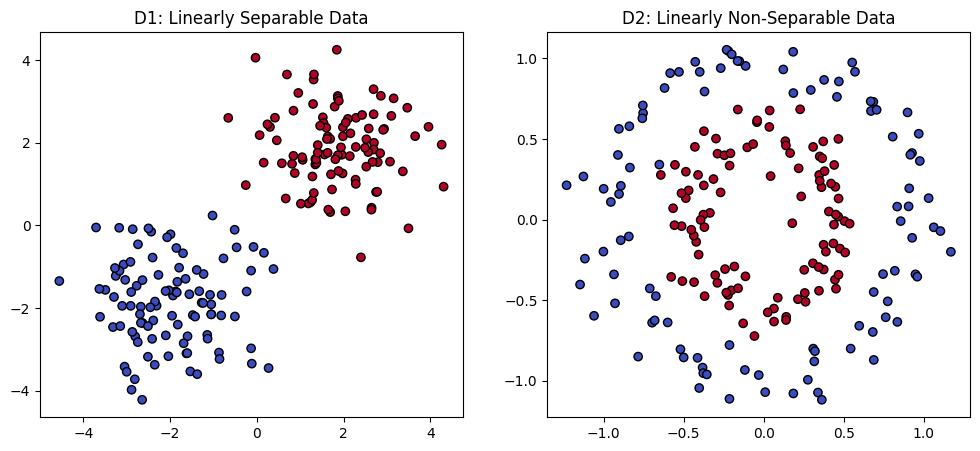

In [4]:
import matplotlib.pyplot as plt  

# plot d1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(D1_X[:, 0], D1_X[:, 1], c=D1_y, cmap='coolwarm', edgecolors='k')
plt.title('D1: Linearly Separable Data')

  # plot d2
plt.subplot(1, 2, 2)
plt.scatter(D2_X[:, 0], D2_X[:, 1], c=D2_y, cmap='coolwarm', edgecolors='k')
plt.title('D2: Linearly Non-Separable Data')
plt.show()

## Question 5

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

  # hard-margin svm
hard_margin_svm = SVC(kernel='linear', C=1e10)
hard_margin_svm.fit(D1_X_train, D1_y_train)

  # training results
D1_train_pred = hard_margin_svm.predict(D1_X_train)
D1_train_acc = accuracy_score(D1_y_train, D1_train_pred)

  # test results
T1_pred = hard_margin_svm.predict(T1_X)
T1_acc = accuracy_score(T1_y, T1_pred)

print(f'Hard-Margin SVM Training Accuracy: {D1_train_acc * 100:.2f}%')
print(f'Hard-Margin SVM Test Accuracy: {T1_acc * 100:.2f}%')


Hard-Margin SVM Training Accuracy: 100.00%
Hard-Margin SVM Test Accuracy: 100.00%


## Question 6

In [6]:
  # soft-margin svm
soft_margin_svm = SVC(kernel='linear', C=1.0)
soft_margin_svm.fit(D2_X_train, D2_y_train)

  # training results
D2_train_pred = soft_margin_svm.predict(D2_X_train)
D2_train_acc = accuracy_score(D2_y_train, D2_train_pred)

  # test results
T2_pred = soft_margin_svm.predict(T2_X)
T2_acc = accuracy_score(T2_y, T2_pred)

print(f'Soft-Margin SVM Training Accuracy: {D2_train_acc * 100:.2f}%')
print(f'Soft-Margin SVM Test Accuracy: {T2_acc * 100:.2f}%')


Soft-Margin SVM Training Accuracy: 53.89%
Soft-Margin SVM Test Accuracy: 55.00%


## Question 7

In [7]:
from sklearn.neural_network import MLPClassifier

  # mlp for d1
mlp_D1 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, random_state=42)
mlp_D1.fit(D1_X_train, D1_y_train)

  # training results
D1_mlp_train_pred = mlp_D1.predict(D1_X_train)
D1_mlp_train_acc = accuracy_score(D1_y_train, D1_mlp_train_pred)

  # test results
T1_mlp_pred = mlp_D1.predict(T1_X)
T1_mlp_acc = accuracy_score(T1_y, T1_mlp_pred)

print(f'MLP for D1 Training Accuracy: {D1_mlp_train_acc * 100:.2f}%')
print(f'MLP for D1 Test Accuracy: {T1_mlp_acc * 100:.2f}%')

  # mlp for d2
mlp_D2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, random_state=42)
mlp_D2.fit(D2_X_train, D2_y_train)

  # training results
D2_mlp_train_pred = mlp_D2.predict(D2_X_train)
D2_mlp_train_acc = accuracy_score(D2_y_train, D2_mlp_train_pred)

  # test results
T2_mlp_pred = mlp_D2.predict(T2_X)
T2_mlp_acc = accuracy_score(T2_y, T2_mlp_pred)

print(f'MLP for D2 Training Accuracy: {D2_mlp_train_acc * 100:.2f}%')
print(f'MLP for D2 Test Accuracy: {T2_mlp_acc * 100:.2f}%')


MLP for D1 Training Accuracy: 100.00%
MLP for D1 Test Accuracy: 100.00%
MLP for D2 Training Accuracy: 99.44%
MLP for D2 Test Accuracy: 100.00%


In [8]:
print("\nSVM vs MLP on D1 and D2:")

print(f"\nD1 Hard-Margin SVM Training Accuracy: {D1_train_acc * 100:.4f}%")
print(f"D1 Hard-Margin SVM Test Accuracy: {T1_acc * 100:.4f}%")

print(f"D1 MLP Training Accuracy: {D1_mlp_train_acc * 100:.4f}%")
print(f"D1 MLP Test Accuracy: {T1_mlp_acc * 100:.4f}%")

print(f"\nD2 Soft-Margin SVM Training Accuracy: {D2_train_acc * 100:.4f}%")
print(f"D2 Soft-Margin SVM Test Accuracy: {T2_acc * 100:.4f}%")

print(f"D2 MLP Training Accuracy: {D2_mlp_train_acc * 100:.4f}%")
print(f"D2 MLP Test Accuracy: {T2_mlp_acc * 100:.4f}%")



SVM vs MLP on D1 and D2:

D1 Hard-Margin SVM Training Accuracy: 100.0000%
D1 Hard-Margin SVM Test Accuracy: 100.0000%
D1 MLP Training Accuracy: 100.0000%
D1 MLP Test Accuracy: 100.0000%

D2 Soft-Margin SVM Training Accuracy: 53.8889%
D2 Soft-Margin SVM Test Accuracy: 55.0000%
D2 MLP Training Accuracy: 99.4444%
D2 MLP Test Accuracy: 100.0000%


### Comments on the result:

#### D1:

The hard-margin SVM achieved perfect accuracy on both the training and test sets, which is expected given the linear separability of the data. This indicates that the SVM was able to find a hyperplane (in this case, a line) that perfectly separates the two classes.

The MLP also achieved perfect accuracy on both the training and test sets for the linearly separable D1. This indicates that the MLP was able to learn the separation boundary effectively without overfitting in this case.

#### D2:

The soft-margin SVM didn't achieve a good accuracy on both the training and test data, showing that it struggles to handle non-linearly separable data. The concentric circles are not separable with a linear kernel even with soft margins.

The MLP significantly outperformed the soft-margin SVM on the training set with near-perfect accuracy and with perfect accuracy on the test set. This higher accuracy shows that the MLP is much better at capturing non-linear relationships, making it more effective for classifying the concentric circles in D2.